### Load the dataset "supermarket_sales.csv"

In [4]:
import pandas as pd

#load the dataset
data = pd.read_csv("data/supermarket_sales.csv")

#display the first few rows using .head()
print(data.head())


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428   Alex     Yangon        Member  Female   
1  226-31-3081   Giza  Naypyitaw        Normal  Female   
2  631-41-3108   Alex     Yangon        Normal  Female   
3  123-19-1176   Alex     Yangon        Member  Female   
4  373-73-7910   Alex     Yangon        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Sales       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

          Time      Payment    cogs  gross margin percentage  gross income  \
0   1:08:00 PM      Ewallet  522.83                 4.761905       26.1415   
1  10:29

## verification of csv using .shape

In [5]:
print("Shape of dataset:", data.shape)

Shape of dataset: (1000, 17)


### Basic exploration

In [6]:
# understand the data
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [8]:
# check the missing values using .isnull()
print("missing values:", data.isnull().sum())

missing values: Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [9]:
# check for duplicate rows using '.duplicateted()'
print("Duplicate Rows:", data.duplicated().sum())

Duplicate Rows: 0


### Perform Exploratory Data Analysis

#### 1. General Analysis

In [12]:
# General sales analysis

#total sales
total_sales = data["Sales"].sum()
print("Total sales:", total_sales)

#Average Rating
avg_rating = data["Rating"].mean()
print("Average Rating:", avg_rating)



Total sales: 322966.749
Average Rating: 6.9727


#### 2. Branch and City Analysis

In [13]:
# sales by branch using '.groupby'
sales_by_branch = data.groupby("Branch")["Sales"].sum()
print(sales_by_branch)

Branch
Alex     106200.3705
Cairo    106197.6720
Giza     110568.7065
Name: Sales, dtype: float64


In [44]:
# sales by city using '.groupby'
sales_by_city = data.groupby("City")["Sales"].sum()
sales_by_city_sorted = sales_by_city.sort_values(ascending=False).reset_index()
print(sales_by_city_sorted)

        City        Sales
0  Naypyitaw  110568.7065
1     Yangon  106200.3705
2   Mandalay  106197.6720


#### 3. Product Line Performance

In [45]:
#total sales by product line or category of product
sales_by_product_line = data.groupby("Product line")["Sales"].sum()

# Reset the index to turn the product line into a column and sort by sales
sales_by_product_line_sorted = sales_by_product_line.sort_values(ascending=False).reset_index()

# Print the result
print(sales_by_product_line_sorted)

             Product line       Sales
0      Food and beverages  56144.8440
1       Sports and travel  55122.8265
2  Electronic accessories  54337.5315
3     Fashion accessories  54305.8950
4      Home and lifestyle  53861.9130
5       Health and beauty  49193.7390


### Visualization

#### Bar Plot: Sales By Product Line

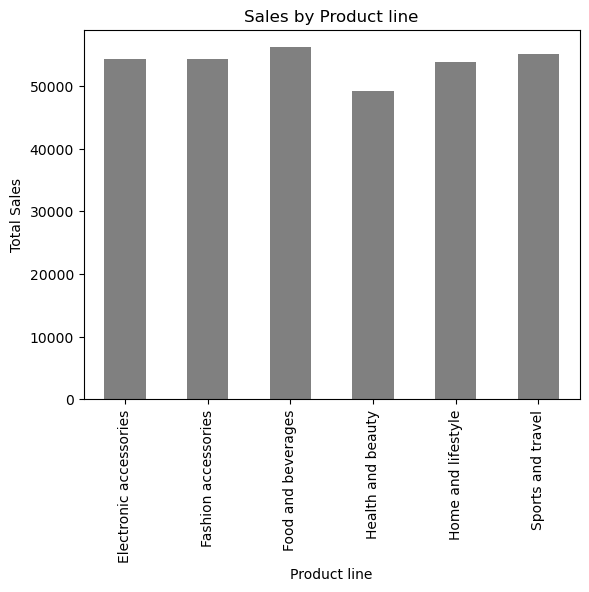

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot sales by product line
sales_by_product_line.plot(kind="bar", title="Sales by Product line",  color = "grey")
plt.ylabel("Total Sales")
plt.show()

#### Pie Chart: Payment Method Distribution:

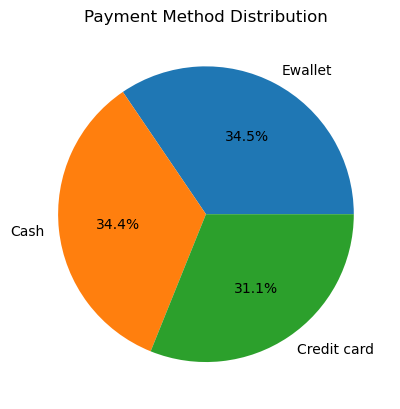

In [62]:
# pament count by different methods
payment_counts = data["Payment"].value_counts()

#pie chart
payment_counts.plot(kind="pie", autopct="%1.1f%%", title = "Payment Method Distribution")
plt.ylabel("")
plt.show()